In [1]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [2]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head(10)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [3]:
shops.loc[0]

coffee_shop_name                      The Factory - Cafe With a Soul 
full_review_text     11/25/2016 1 check-in Love love loved the atm...
star_rating                                          5.0 star rating 
Name: 0, dtype: object

In [4]:
shops.star_rating.unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [5]:
rating = {
    ' 5.0 star rating ' : 5.0,
    ' 4.0 star rating ' : 4.0,
    ' 3.0 star rating ' : 3.0,
    ' 2.0 star rating ' : 2.0,
    ' 1.0 star rating ' : 1.0,
}
# replace the rating with easily readible numbers

In [6]:
shops.star_rating.dtype

dtype('O')

In [7]:
shops.replace(rating, inplace = True)

In [8]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [9]:
pd.options.display.max_colwidth = 10000

In [10]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0
2,The Factory - Cafe With a Soul,"11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average. It feels like a Los Angeles coffee shot that is out of place.,2.0
4,The Factory - Cafe With a Soul,"12/3/2016 1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). This place is ideal for ordering a few dishes to share with your group. Seating is limited since this place is fairly new with lots of visitors. Arrive early and be prepared to wait a bit if you with a large grop. Store front facing Burnet Rd See all photos from Michelle A. for The Factory - Cafe With a Soul",4.0


In [11]:
shops.shape

(7616, 3)

In [12]:
# match = re.search(r'(\d+/\d+/\d+)', shops['full_review_text'].to_string())
shops['date']= '0/0/0000'

In [13]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0,0/0/0000
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0,0/0/0000
2,The Factory - Cafe With a Soul,"11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0,0/0/0000
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average. It feels like a Los Angeles coffee shot that is out of place.,2.0,0/0/0000
4,The Factory - Cafe With a Soul,"12/3/2016 1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). This place is ideal for ordering a few dishes to share with your group. Seating is limited since this place is fairly new with lots of visitors. Arrive early and be prepared to wait a bit if you with a large grop. Store front facing Burnet Rd See all photos from Michelle A. for The Factory - Cafe With a Soul",4.0,0/0/0000


In [14]:
for index, row in shops.iterrows():
    match = re.search(r'(\d+/\d+/\d+)', row['full_review_text'])
    # print(match.group(1))
    shops['date'].at[index] = match.group(1)
    shops['full_review_text'].at[index] = re.sub(match.group(1), "", row['full_review_text'])
    
    
def clean(text):

    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [15]:
shops['tokens'] = shops['full_review_text'].apply(clean)

In [16]:
shops['date'] = pd.to_datetime(shops['date'])
shops['date'].dtype

dtype('<M8[ns]')

In [17]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,"1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0,2016-11-25,"[1, checkin, love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha, latte, and, it, was, muy, fantastico, ordering, and, getting, my, drink, were, pretty, streamlined, i, ordered, on, an, ipad, which, included, all, beverage, selections, that, ranged, from, coffee, to, wine, desired, level, of, sweetness, and, a, checkout, system, i, got, my, latte, within, minutes, i, was, hoping, for, a, typical, heart, or, feather, on, my, latte, but, found, myself, listing, out, all, the, possibilities, of, what, the, art, may, be, any, ideas]"
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0,2016-12-02,"[listed, in, date, night, austin, ambiance, in, austin, beautiful, love, the, ambiance, instagramworthy, definitely, so, be, prepared, this, is, gonna, cost, you, a, pretty, penny, waffle, dessert, was, just, decentnothing, to, rave, about, but, will, probably, be, back, just, to, be, somewhere, unique, and, nice]"
2,The Factory - Cafe With a Soul,"1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0,2016-11-30,"[1, checkin, listed, in, brunch, spots, i, loved, the, eclectic, and, homey, plush, decor, and, who, doesnt, want, to, swing, and, drink, their, coffee, i, would, categorize, this, as, a, pricier, coffee, place, but, to, me, it, was, worth, it, after, thanksgiving, nobody, wants, to, make, brunch, so, we, headed, out, in, search, of, chicken, and, waffles, there, is, ample, parking, in, the, private, lot, and, ordering, is, done, through, ipads, pick, a, seat, and, they, will, call, your, name, when, your, items, are, ready, be, patient, because, some, of, the, coffee, drinks, take, longer, than, others, i, had, the, ...]"
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating However... Just about everyt

In [18]:
from collections import Counter

shops['tokens'].apply(lambda x: Counter.update(x))
Counter.most_common(10)

AttributeError: 'int' object has no attribute 'items'

In [19]:
from collections import Counter

word_count = Counter()
shops['tokens'].apply(lambda x: word_count.update(x))
word_count.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [20]:
# will now create two frames with good and bad 
# and view the word importance using  joeys method

good = shops[ shops['star_rating'] >= 4.0 ]

In [21]:
good.head(3)

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,"1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0,2016-11-25,"[1, checkin, love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha, latte, and, it, was, muy, fantastico, ordering, and, getting, my, drink, were, pretty, streamlined, i, ordered, on, an, ipad, which, included, all, beverage, selections, that, ranged, from, coffee, to, wine, desired, level, of, sweetness, and, a, checkout, system, i, got, my, latte, within, minutes, i, was, hoping, for, a, typical, heart, or, feather, on, my, latte, but, found, myself, listing, out, all, the, possibilities, of, what, the, art, may, be, any, ideas]"
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0,2016-12-02,"[listed, in, date, night, austin, ambiance, in, austin, beautiful, love, the, ambiance, instagramworthy, definitely, so, be, prepared, this, is, gonna, cost, you, a, pretty, penny, waffle, dessert, was, just, decentnothing, to, rave, about, but, will, probably, be, back, just, to, be, somewhere, unique, and, nice]"
2,The Factory - Cafe With a Soul,"1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0,2016-11-30,"[1, checkin, listed, in, brunch, spots, i, loved, the, eclectic, and, homey, plush, decor, and, who, doesnt, want, to, swing, and, drink, their, coffee, i, would, categorize, this, as, a, pricier, coffee, place, but, to, me, it, was, worth, it, after, thanksgiving, nobody, wants, to, make, brunch, so, we, headed, out, in, search, of, chicken, and, waffles, there, is, ample, parking, in, the, private, lot, and, ordering, is, done, through, ipads, pick, a, seat, and, they, will, call, your, name, when, your, items, are, ready, be, patient, because, some, of, the, coffee, drinks, take, longer, than, others, i, had, the, ...]"


In [22]:
bad = shops[ shops['star_rating'] < 4.0 ]

In [23]:
bad.head(3)

,coffee_shop_name,full_review_text,star_rating,date,tokens
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average. It feels like a Los Angeles coffee shot that is out of place.,2.0,2016-11-25,"[very, cool, decor, good, drinks, nice, seating, however, just, about, everything, is, overpriced, 150, extra, for, 3, ounces, of, almond, milk, in, a, cortado, no, wifi, music, is, a, bit, loud, and, the, mix, is, odd, pleasant, french, oldies, followed, by, loud, techno, several, tables, were, dirty, when, we, got, there, service, is, average, it, feels, like, a, los, angeles, coffee, shot, that, is, out, of, place]"
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pros: Music Seating Decor General ambiance Service Cons: iPad ordering (I'm a crotchety old man, kids) Limited coffee menu, or menu in general Relatively expensive Food is pretty but lackluster I'm still sitting here as I type this and I'm less than overjoyed with the experience, sadly. The space and vibe are great but not quite familiar or intimate enough to beat out a place like Genuine Joe down the street. It seems like they bank on the vibe, and fall short the rest of the way. (This would be a great hangout for the artsy/design crowd having a collaborative meeting.) The staff is great but the iPad ordering system limits your required interaction with them. They take pride in no wifi to increase interaction but then use iPads instead of people? Seating is ample, if cramped in a surprisingly large space. But the food, kids. So pretty, but again lackluster. I tried the Pop+art ($5) and the Nutella Waffle ($4.75) and they both sit on their respective tiny awkward plates half eaten. (Yes the plate liners are cute) The waffle is a great idea but the waffle itself has no flavor and there's no delight. The tart is similar - the pastry crust is much too thick compared to the Smuckers jam tasting filling and it is essentially just pure sugar. The pastry itself doesn't even taste buttery or crisp. Meh. There appears to be no soul in this confectionary. Coffee- passable. But at $4 for a cortado and a $1.50 up-charge for almond milk- I'll pick another place. I get why the reviews are so good here, but there are much better places nearby for that ""cafe with a soul"" feel. This feels like an ACL pop-up. Going for that? Great, come here. Pop+art and Cortado Emailed receipt and satisfaction survey. See all photos from Kimberlee A. for The Factory - Cafe With a Soul",3.0,2016-10-25,"[1, checkin, ok, lets, try, this, approach, pros, music, seating, decor, general, ambiance, service, cons, ipad, ordering, im, a, crotchety, old, man, kids, limited, coffee, menu, or, menu, in, general, relatively, expensive, food, is, pretty, but, lackluster, im, still, sitting, here, as, i, type, this, and, im, less, than, overjoyed, with, the, experience, sadly, the, space, and, vibe, are, great, but, not, quite, familiar, or, intimate, enough, to, beat, out, a, place, like, genuine, joe, down, the, street, it, seems, like, they, bank, on, the, vibe, and, fall, short, the, rest, of, the, way, this, would, be, a, great, hangout, ...]"
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, the coffee it made is not as good as other coffee shop in the surrounding area. It has no wifi, so good for hang out with friend or read a book. Not sure why there is no restroom here. Ordering app is well made, but probably won't be my coffee stop because of the quality of food/coffee. It's selling you the atmosphere they created, so don't expected the food/coffee. Probably would be a good date spot. 8 dollar tiny chicken and waffle. One of the most expensive chicken and waffle.",3.0,2016-11-20,"

In [24]:
def count(docs):

        word_count = Counter()
        appears = Counter()
        
        doc_length = len(docs)

        for doc in docs:
            word_count.update(doc)
            appears.update(set(doc))

        temp = zip(word_count.keys(), word_count.values())
        word_stats = pd.DataFrame(temp, columns = ['word', 'count'])
        
        word_stats['rank'] = word_stats['count'].rank(method='first', ascending=False)
        
        total = word_stats['count'].sum()

        word_stats['pct_total'] = word_stats['count'].apply(lambda x: x / total)
        
        word_stats = word_stats.sort_values(by='rank')
        word_stats['cumsum_pct_total'] = word_stats['pct_total'].cumsum()

        temp2 = zip(appears.keys(), appears.values())
        ac = pd.DataFrame(temp2, columns=['word', 'appears'])
        
        word_stats = ac.merge(word_stats, on='word')

        word_stats['appearence_pct'] = word_stats['appears'].apply(lambda x: x / doc_length)
        
        return word_stats.sort_values(by='rank')

In [25]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [26]:
good_word_count = count(good['tokens'])
bad_word_count = count(bad['tokens'])

In [27]:
good_word_count.head()

,word,appears,count,rank,pct_total,cumsum_pct_total,appearence_pct
68,the,5479,26616,1.0,0.044701,0.044701,0.892345
57,and,5545,21311,2.0,0.035791,0.080492,0.903094
48,a,4983,17706,3.0,0.029737,0.110229,0.811564
43,i,4344,14952,4.0,0.025111,0.135340,0.707492
4,to,4452,12763,5.0,0.021435,0.156775,0.725081


In [28]:
bad_word_count.head()

,word,appears,count,rank,pct_total,cumsum_pct_total,appearence_pct
51,the,1368,8193,1.0,0.045889,0.045889,0.926829
45,and,1319,5339,2.0,0.029904,0.075793,0.893631
171,i,1184,5285,3.0,0.029601,0.105394,0.802168
38,a,1263,5049,4.0,0.028280,0.133674,0.855691
151,to,1201,4401,5.0,0.024650,0.158324,0.813686


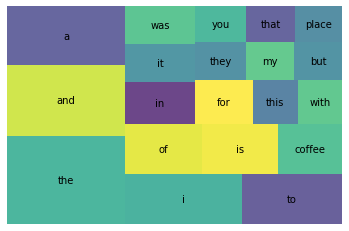

In [29]:
good_word_count_top20 = good_word_count[good_word_count['rank'] <= 20]

squarify.plot(sizes=good_word_count_top20['pct_total'], label=good_word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

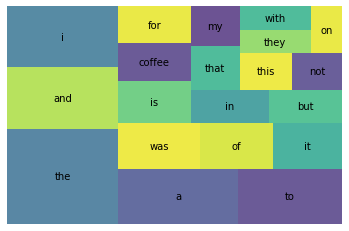

In [30]:
bad_word_count_top20 = bad_word_count[bad_word_count['rank'] <= 20]

squarify.plot(sizes=bad_word_count_top20['pct_total'], label=bad_word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [31]:
# nlp.Defaults.stop_words

In [32]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [33]:
shops.tokens.head()

0                                                                                                                                                                                                                                                                                                                                                        [  , 1, check-in, love, love, loved, atmosphere!, corner, coffee, shop, style,, swings!!!, ordered, matcha, latte,, muy, fantastico!, ordering, getting, drink, pretty, streamlined., ordered, ipad,, included, beverage, selections, ranged, coffee, wine,, desired, level, sweetness,, checkout, system., got, latte, minutes!,  , hoping, typical, heart, feather, latte,, found, listing, possibilities, art, be., ideas?]
1                                                                                                                                                                                                                                               

In [34]:
good = shops[ shops['star_rating'] >= 4.0 ]
bad = shops[ shops['star_rating'] < 4.0 ]
good_word_count = count(good['tokens'])
bad_word_count = count(bad['tokens'])

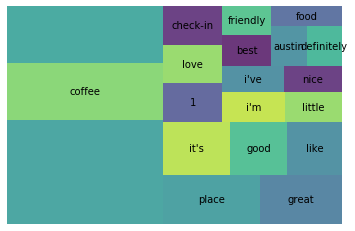

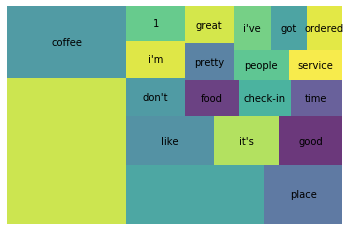

In [35]:
good_word_count_top20 = good_word_count[good_word_count['rank'] <= 20]

squarify.plot(sizes=good_word_count_top20['pct_total'], label=good_word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

bad_word_count_top20 = bad_word_count[bad_word_count['rank'] <= 20]

squarify.plot(sizes=bad_word_count_top20['pct_total'], label=bad_word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [53]:
STOP_WORDS = nlp.Defaults.stop_words.union(['1', '-', "i'm", 'i', 'it', "it's", 'it.', 'the', 'this', "i've", "place", "don't", "pretty", "coffee"])

In [54]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens



In [55]:
good = shops[ shops['star_rating'] >= 4.0 ]
bad = shops[ shops['star_rating'] < 4.0 ]
good_word_count = count(good['tokens'])
bad_word_count = count(bad['tokens'])

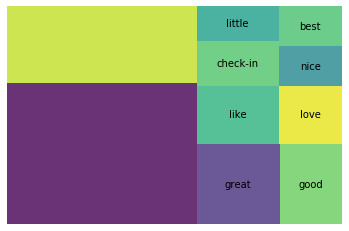

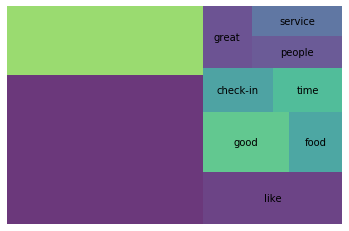

In [58]:
good_word_count_top20 = good_word_count[good_word_count['rank'] <= 10]

squarify.plot(sizes=good_word_count_top20['pct_total'], label=good_word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

bad_word_count_top20 = bad_word_count[bad_word_count['rank'] <= 10]

squarify.plot(sizes=bad_word_count_top20['pct_total'], label=bad_word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
"""
seems like bigg difference is like and great, along with food, and time.
love was also mentioned quite a bit in the ratings 4 and above. 
The people in negatively rated reviews could have also been a factor, as the word 
appearsd frequently
"""